News Api is used to extract news articles from various sources about the companies for whose stocks we are interested in.
News API is a simple, easy-to-use REST API that returns JSON search results for current and historic news articles published by over 80,000 worldwide sources.

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## Reliance Industries

In [2]:
reliance_data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/reliance_industries_news_text_analytics.csv')

In [3]:
reliance_data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-08-25T13:30:05Z,NaN,Zacks.com,Zacks Equity Research,Why Winnebago Industries (WGO) is a Top Stock ...,"Finding strong, market-beating stocks with a p...","August\r\n25, 2021\r\n5 min read\r\nThis story...","August\r\n25, 2021\r\n5 min read\r\nThis story...",august 25 2021 5 min read story originally app...,26,164,"['august', '25', '2021', '5', 'min', 'read', '...",['august 25 2021 5 min read story originally a...,"[('august', 'RB'), ('25', 'CD'), ('2021', 'CD'...","('august 25', 0, 9, 'DATE', 'Absolute or relat...",0.30625,positive,stock min read zacks offer
1,1,2021-08-16T08:34:00Z,reuters,Reuters,Reuters,MIDEAST STOCKS Abu Dhabi outperforms Gulf peer...,Abu Dhabi stocks rose in early trade on Monday...,An investor monitors a screen displaying stock...,An investor monitors a screen displaying stock...,investor monitor screen displaying stock infor...,28,181,"['investor', 'monitors', 'screen', 'displaying...",['investor monitors screen displaying stock in...,"[('investor', 'NN'), ('monitor', 'NN'), ('scre...","('abu dhabi security exchange', 53, 80, 'ORG',...",0.35000,positive,stock abu dhabi monday monitor


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'Reliance Industries'}, xlabel='source-name', ylabel='number of articles'>

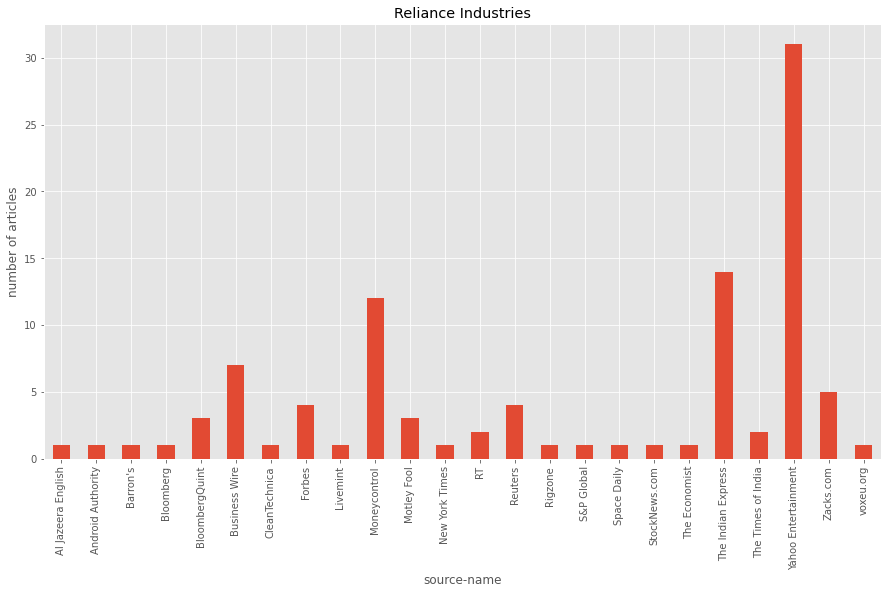

In [4]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title('Reliance Industries')
reliance_data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'Reliance Industries'}, ylabel='number of articles'>

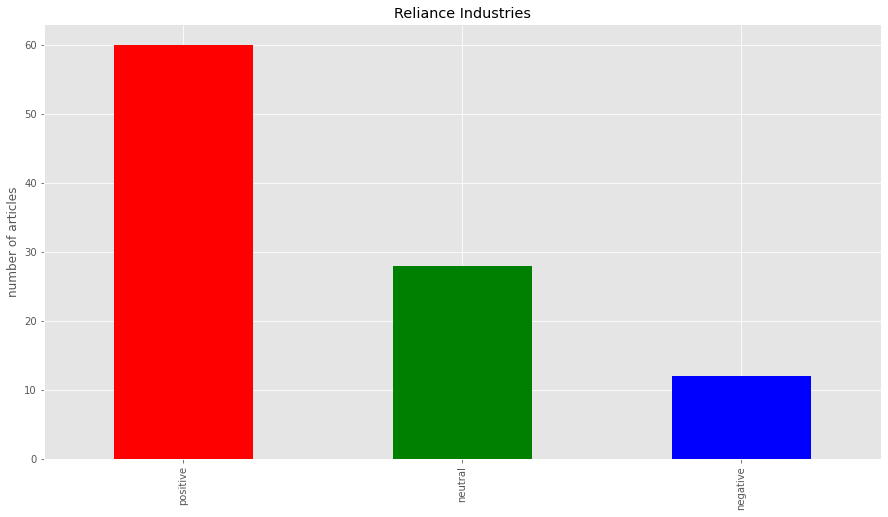

In [5]:
pd.value_counts(reliance_data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title='Reliance Industries')

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

### word cloud

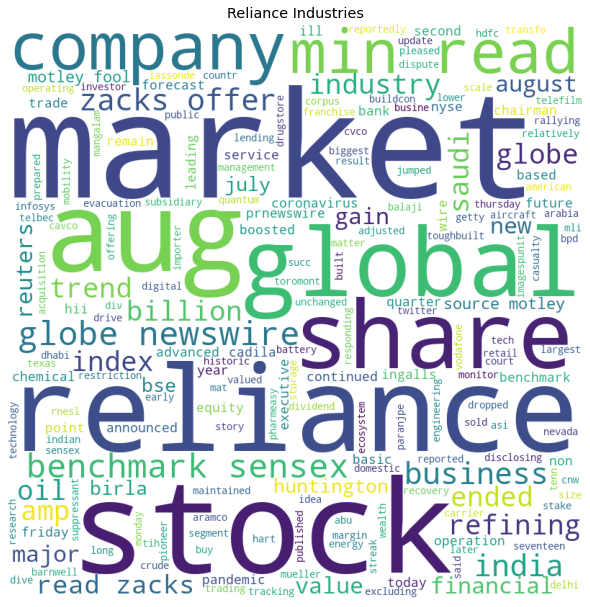

In [7]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in reliance_data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Reliance Industries') 
plt.show()

### scatter plot between sentiment analysis and share closing price

In [8]:
import yfinance as yf
df = yf.download("RELIANCE.NS RCOM.NS HDFCBANK.NS INFY.NS NESTLEIND.NS TATAMOTORS.NS HINDUNILVR.NS", start='2021-07-29', end="2021-08-27",group_by="ticker")

[*********************100%***********************]  7 of 7 completed


In [9]:
hdfc = pd.DataFrame(df['HDFCBANK.NS']['Close']).reset_index()
reliance = pd.DataFrame(df['RELIANCE.NS']['Close']).reset_index()
tatamotors = pd.DataFrame(df['TATAMOTORS.NS']['Close']).reset_index()
rel_com = pd.DataFrame(df['RCOM.NS']['Close']).reset_index()
infy = pd.DataFrame(df['INFY.NS']['Close']).reset_index()
nestle = pd.DataFrame(df['NESTLEIND.NS']['Close']).reset_index()
hul = pd.DataFrame(df['HINDUNILVR.NS']['Close']).reset_index()

In [10]:
hdfc['Date'] = hdfc['Date'].astype('str')
reliance['Date'] = reliance['Date'].astype('str')
tatamotors['Date'] = tatamotors['Date'].astype('str')
rel_com['Date'] = rel_com['Date'].astype('str')
infy['Date'] = infy['Date'].astype('str')
nestle['Date'] = nestle['Date'].astype('str')
hul['Date'] = hul['Date'].astype('str')

In [11]:
data = reliance_data
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T04:25:58Z,-0.034375,2021-07-28
1,2021-07-28T21:25:00Z,0.000000,2021-07-28
2,2021-07-29T04:48:39Z,0.097443,2021-07-29
3,2021-07-29T17:04:53Z,0.042424,2021-07-29
4,2021-07-29T19:56:04Z,-0.150000,2021-07-29


In [12]:
price_sentiment_merge = reliance.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,2053.25,0.097443
1,2021-07-29,2053.25,0.042424


<AxesSubplot:xlabel='Close'>

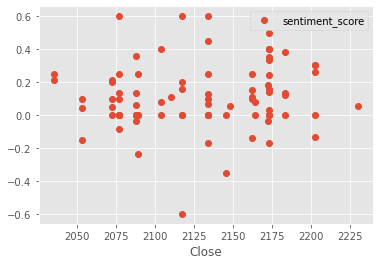

In [13]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'Reliance Industries'}, xlabel='date', ylabel='sentiment of the day'>

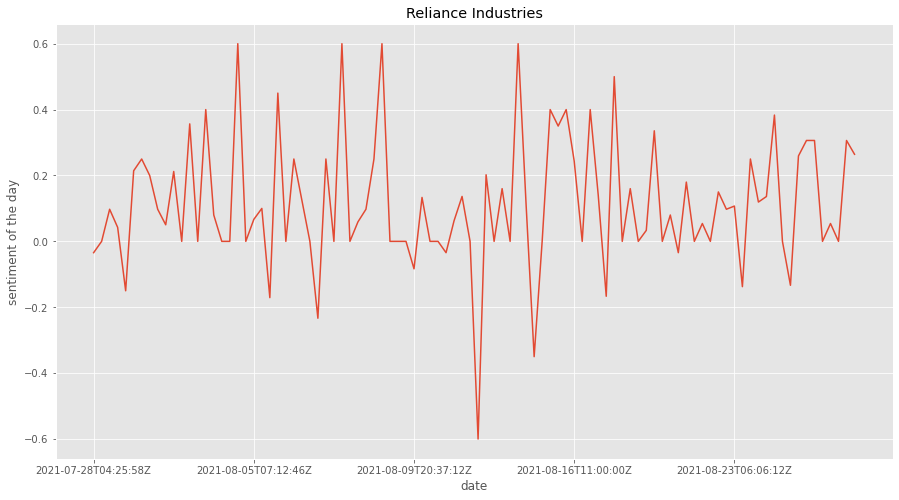

In [14]:
title = 'Reliance Industries'
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)

## infosys

In [15]:
title = 'Infosys'

In [16]:
data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/infosys_news_text_analytics.csv')

In [17]:
data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-08-23T02:31:00Z,reuters,Reuters,Reuters,India's finance minister summons Infosys CEO o...,India's Finance Minister Nirmala Sitharaman ha...,The Infosys logo is seen at the SIBOS banking ...,The Infosys logo is seen at the SIBOS banking ...,infosys logo seen sibos banking financial conf...,26,178,"['infosys', 'logo', 'seen', 'sibos', 'banking'...",['infosys logo seen sibos banking financial co...,"[('infosys', 'NN'), ('logo', 'NN'), ('seen', '...","('infosys', 0, 7, 'PERSON', 'People, including...",0.0000,neutral,reuters logo seen minister nirmala
1,1,2021-08-09T10:28:00Z,reuters,Reuters,Reuters Staff,"Indian shares end higher as IT stocks, banks g...",Indian shares closed higher on Monday on the b...,"By Reuters Staff\r\nBENGALURU, Aug 9 (Reuters)...","By Reuters Staff\r\nBENGALURU, Aug 9 (Reuters)...",reuters staff bengaluru aug 9 reuters indian s...,25,173,"['reuters', 'staff', 'bengaluru', 'aug', '9', ...",['reuters staff bengaluru aug 9 reuters indian...,"[('reuters', 'NNS'), ('staff', 'NN'), ('bengal...","('reuters', 0, 7, 'ORG', 'Companies, agencies,...",0.0375,positive,mahindra reuters information higher firme


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'Infosys'}, xlabel='source-name', ylabel='number of articles'>

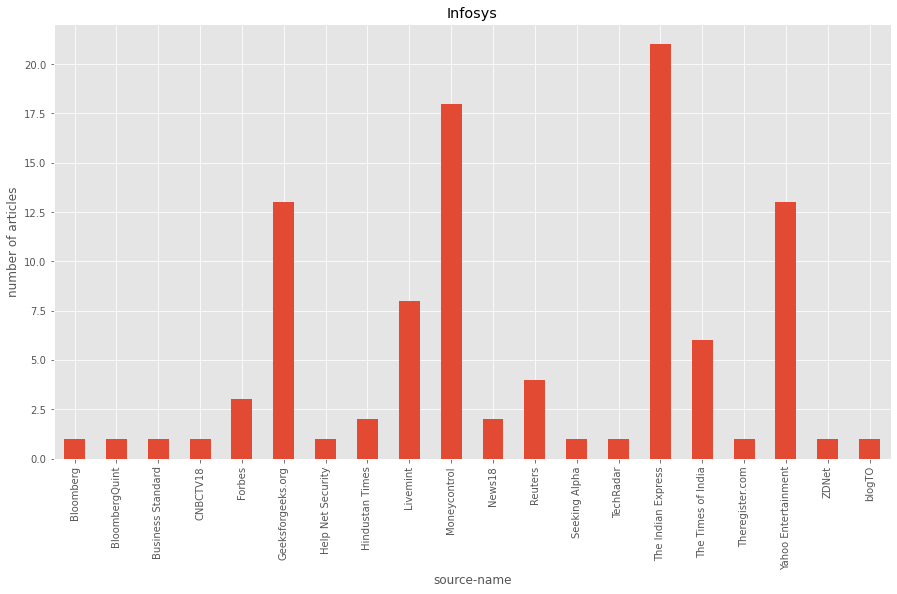

In [18]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title(title)
data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'Infosys'}, ylabel='number of articles'>

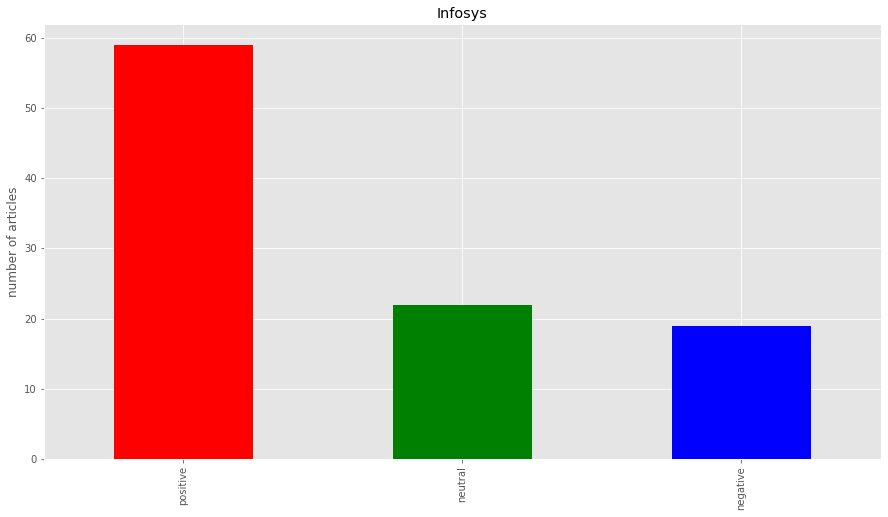

In [19]:
pd.value_counts(data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title=title)

### word cloud

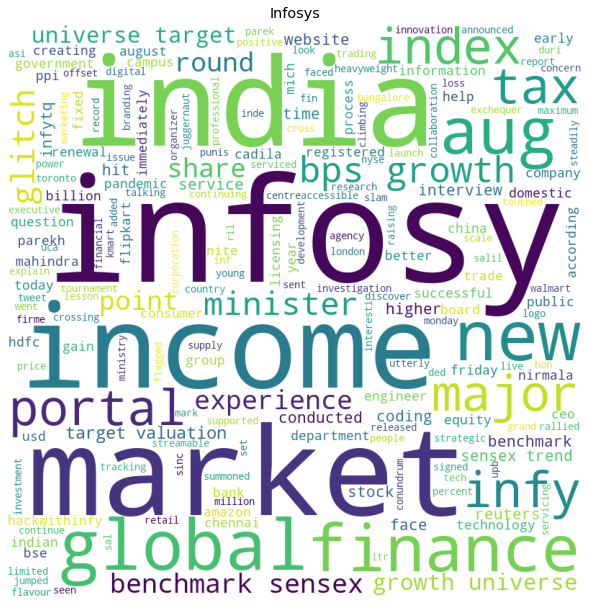

In [20]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(title) 
plt.show()

In [21]:
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T03:35:00Z,0.300000,2021-07-28
1,2021-07-28T04:25:58Z,-0.034375,2021-07-28
2,2021-07-28T09:48:00Z,0.295455,2021-07-28
3,2021-07-28T18:11:25Z,0.156667,2021-07-28
4,2021-07-29T04:48:39Z,0.097443,2021-07-29


In [22]:
price_sentiment_merge = infy.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,1617.0,0.097443
1,2021-07-29,1617.0,0.020000


### scatter plot between sentiment analysis and share closing price

<AxesSubplot:xlabel='Close'>

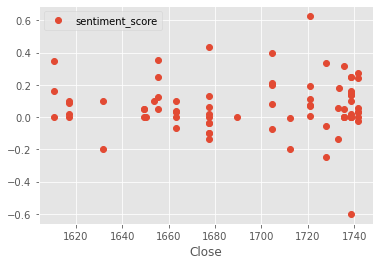

In [23]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'Infosys'}, xlabel='date', ylabel='sentiment of the day'>

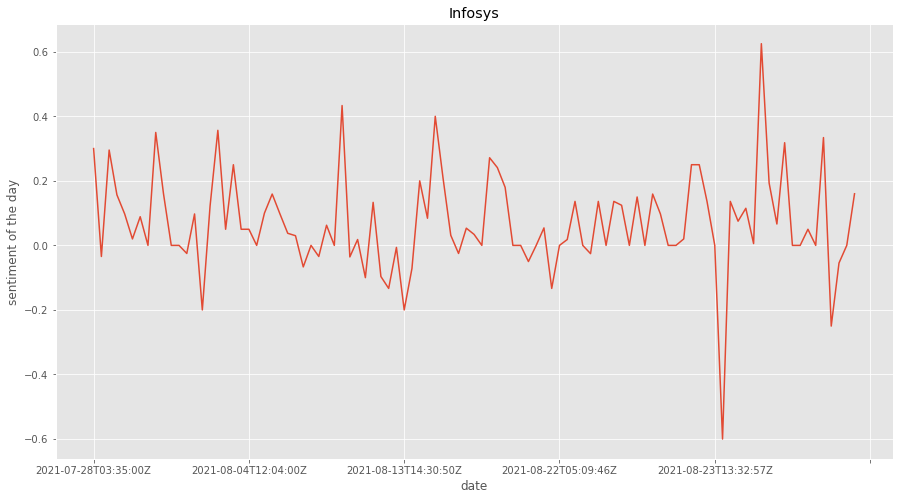

In [24]:
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)

## hdfc

In [25]:
title = 'HDFC'

In [26]:
data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/hdfc_news_text_analytics.csv')

In [27]:
data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-08-17T14:38:00Z,reuters,Reuters,Reuters,India cenbank allows HDFC Bank to issue new cr...,India's central bank has allowed HDFC Bank <a ...,The headquarters of India's HDFC bank is pictu...,The headquarters of India's HDFC bank is pictu...,headquarters india hdfc bank pictured mumbai i...,27,179,"['headquarters', 'india', 'hdfc', 'bank', 'pic...",['headquarters india hdfc bank pictured mumbai...,"[('headquarters', 'NNS'), ('india', 'VBP'), ('...","('india', 13, 18, 'GPE', 'Countries, cities, s...",0.000000,neutral,india hdfc bank reuters andradebengaluru
1,1,2021-08-18T04:55:00Z,reuters,Reuters,Reuters Staff,India's HDFC Bank says cenbank relaxes curbs o...,India's largest private-sector lender HDFC Ban...,By Reuters Staff\r\nBENGALURU (Reuters) -India...,By Reuters Staff\r\nBENGALURU (Reuters) -India...,reuters staff bengaluru reuters india largest ...,28,184,"['reuters', 'staff', 'bengaluru', 'reuters', '...",['reuters staff bengaluru reuters indias large...,"[('reuters', 'NNS'), ('staff', 'NN'), ('bengal...","('reuters', 0, 7, 'ORG', 'Companies, agencies,...",0.034091,positive,issuing bank reuters wednesday restriction


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'HDFC'}, xlabel='source-name', ylabel='number of articles'>

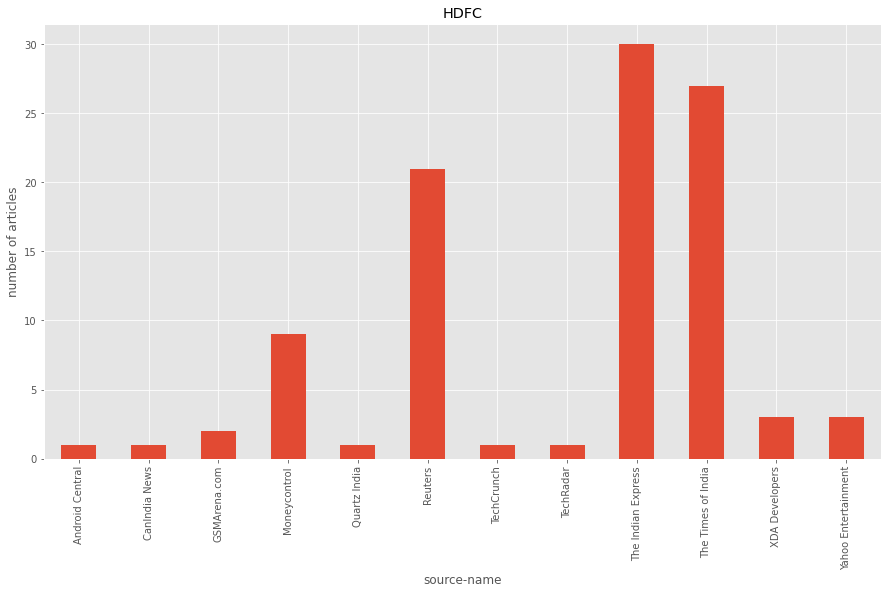

In [28]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title(title)
data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'HDFC'}, ylabel='number of articles'>

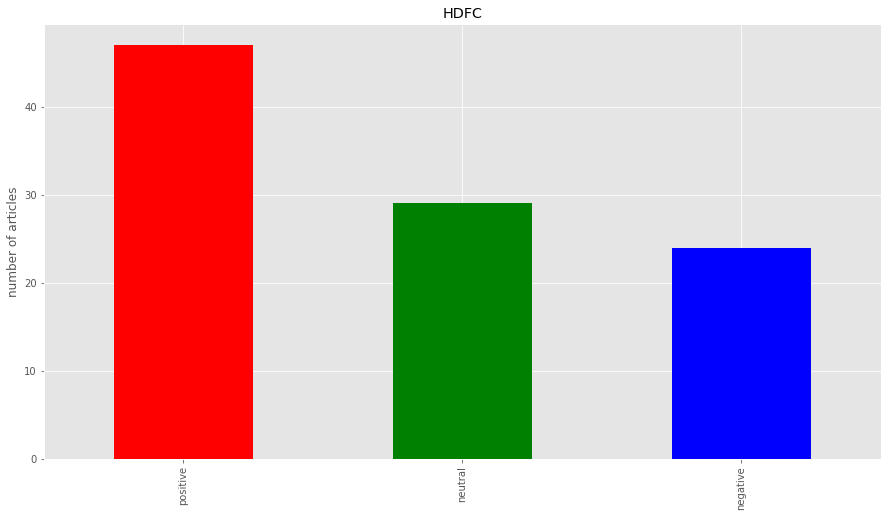

In [29]:
pd.value_counts(data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title=title)

### word cloud

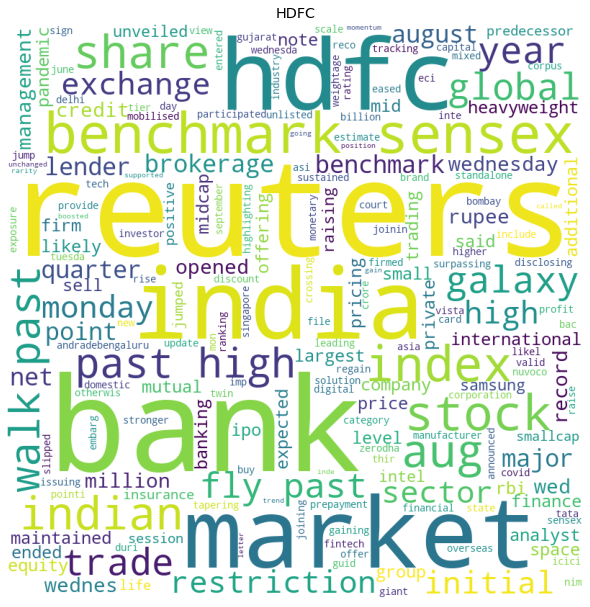

In [30]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(title)  
plt.show()

In [31]:
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T03:52:14Z,0.266667,2021-07-28
1,2021-07-28T04:25:58Z,-0.034375,2021-07-28
2,2021-07-28T05:41:51Z,0.000000,2021-07-28
3,2021-07-28T15:47:05Z,-0.200000,2021-07-28
4,2021-07-29T19:49:44Z,0.000000,2021-07-29


In [32]:
price_sentiment_merge = hdfc.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,1418.250000,0.00000
1,2021-07-30,1426.449951,0.08125


### scatter plot between sentiment analysis and share closing price

<AxesSubplot:xlabel='Close'>

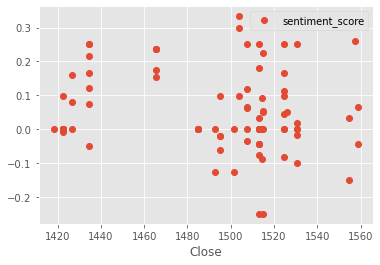

In [33]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'HDFC'}, xlabel='date', ylabel='sentiment of the day'>

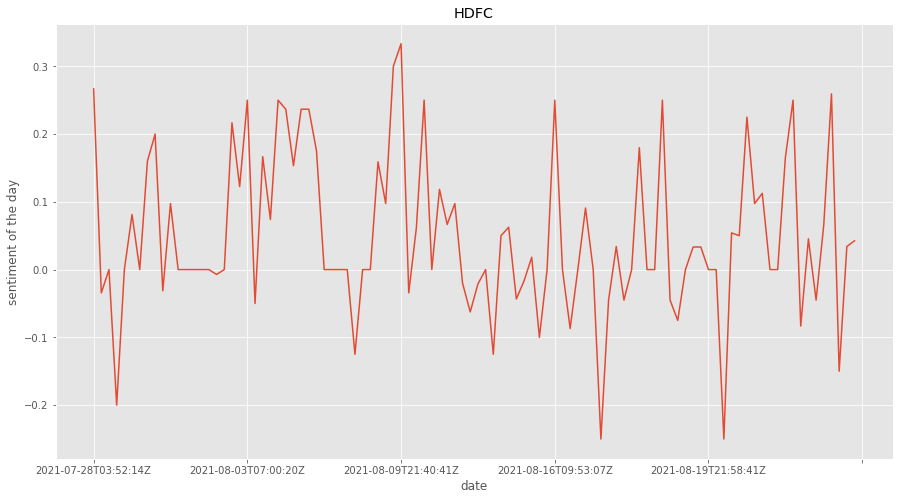

In [34]:
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)

## nestle

In [35]:
title = 'Nestle'

In [36]:
data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/nestle_news_text_analytics.csv')

In [37]:
data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-07-29T05:30:00Z,reuters,Reuters,Reuters,Nestle raises full-year guidance after H1 orga...,"Food giant Nestle <a href=""https://www.reuters...","ZURICH, July 29 (Reuters) - Food giant Nestle ...","ZURICH, July 29 (Reuters) - Food giant Nestle ...",zurich july 29 reuters food giant nestle nesn ...,30,166,"['zurich', 'july', '29', 'reuters', 'food', 'g...",['zurich july 29 reuters food giant nestle nes...,"[('zurich', 'JJ'), ('july', 'NN'), ('29', 'CD'...","('july 29', 7, 14, 'DATE', 'Absolute or relati...",0.236667,positive,organic july nesn better reuters
1,1,2021-07-28T04:27:00Z,reuters,Reuters,Reuters Staff,Indian shares fall after IMF cuts economic gro...,Indian shares fell on Wednesday after the Inte...,"By Reuters Staff\r\nBENGALURU, July 28 (Reuter...","By Reuters Staff\r\nBENGALURU, July 28 (Reuter...",reuters staff bengaluru july 28 reuters indian...,25,167,"['reuters', 'staff', 'bengaluru', 'july', '28'...",['reuters staff bengaluru july 28 reuters indi...,"[('reuters', 'NNS'), ('staff', 'NN'), ('bengal...","('reuters', 0, 7, 'ORG', 'Companies, agencies,...",-0.043750,negative,reuters country weak global cue


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'Nestle'}, xlabel='source-name', ylabel='number of articles'>

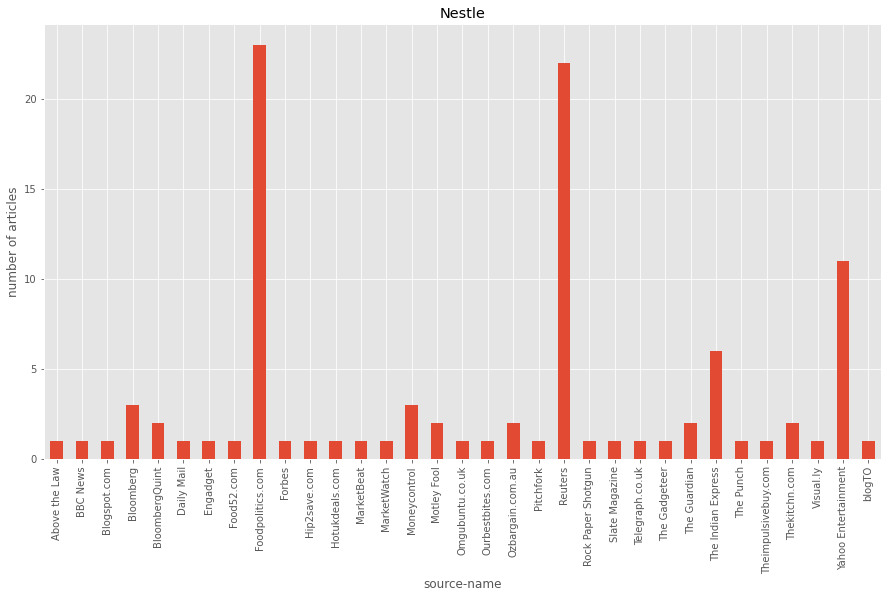

In [38]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title(title)
data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'Nestle'}, ylabel='number of articles'>

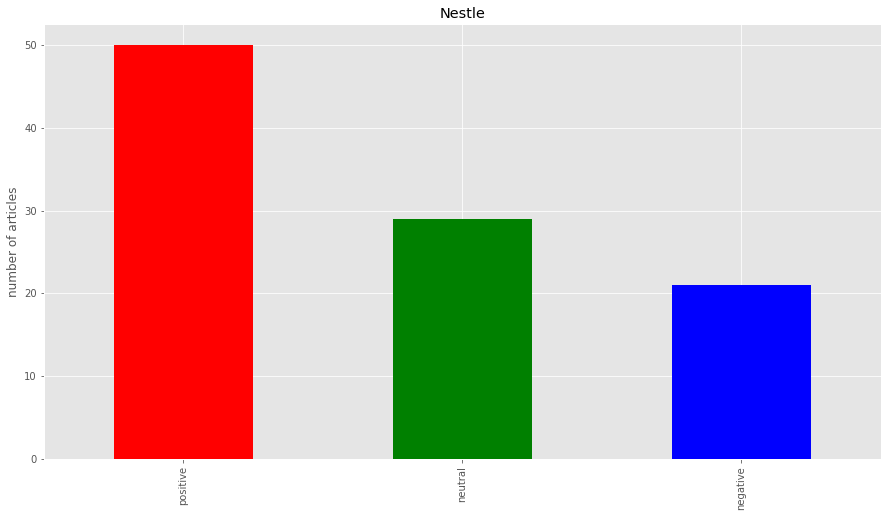

In [39]:
pd.value_counts(data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title=title)

### word cloud

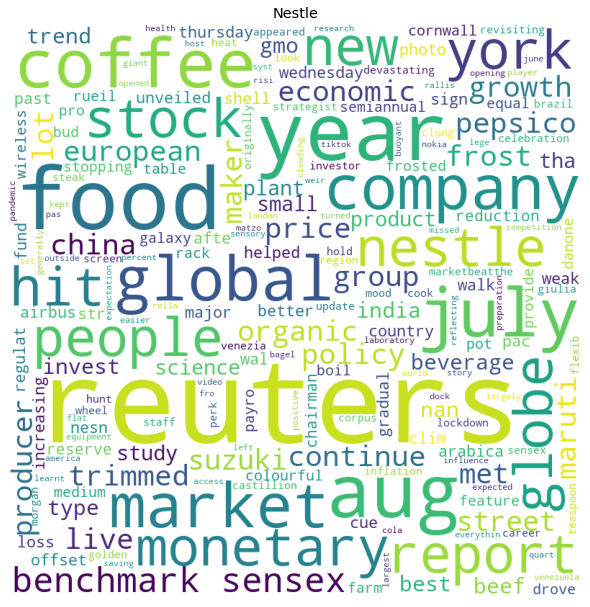

In [40]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(title) 
plt.show()

In [41]:
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T02:14:22Z,0.000000,2021-07-28
1,2021-07-28T04:25:58Z,-0.034375,2021-07-28
2,2021-07-28T04:27:00Z,-0.043750,2021-07-28
3,2021-07-28T04:29:00Z,-0.250000,2021-07-28
4,2021-07-28T05:42:00Z,0.100000,2021-07-28


In [42]:
price_sentiment_merge = nestle.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,17914.75,0.0000
1,2021-07-29,17914.75,0.0875


### scatter plot between sentiment analysis and share closing price

<AxesSubplot:xlabel='Close'>

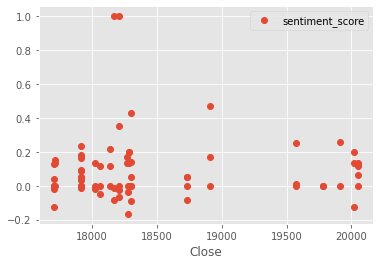

In [43]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'Nestle'}, xlabel='date', ylabel='sentiment of the day'>

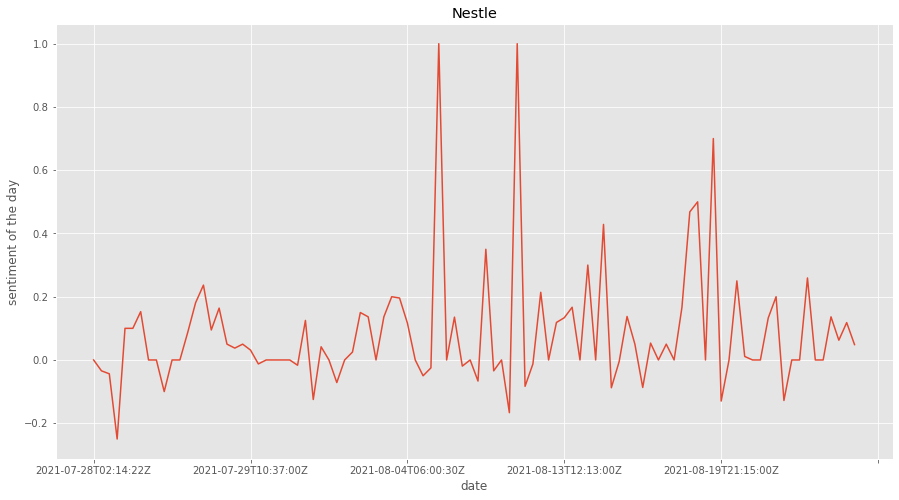

In [44]:
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)

## reliance communications

In [45]:
title = 'Reliance Communications'

In [46]:
data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/reliance_communications_text_analytics.csv')

In [47]:
data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-08-26T11:40:55Z,techcrunch,TechCrunch,Ingrid Lunden,Atheneum nabs $150M to build out its “research...,"Data is the new oil, as the saying goes, and t...","Data is the new oil, as the saying goes, and t...","Data is the new oil, as the saying goes, and t...",data new oil saying go today startup helping c...,23,148,"['data', 'new', 'oil', 'saying', 'goes', 'toda...",['data new oil saying goes today startup helpi...,"[('data', 'NNS'), ('new', 'JJ'), ('oil', 'NN')...","('today', 23, 28, 'DATE', 'Absolute or relativ...",0.086439,positive,new oil growth atheneum startup
1,1,2021-08-10T11:00:00Z,NaN,Canada NewsWire,NaN,BBTV Holdings Inc. Generates 5.5 Billion New M...,/CNW/ - BBTV Holdings Inc. (TSX: BBTV) (OTCQX:...,"VANCOUVER, BC, Aug. 10, 2021 /CNW/ - BBTV Hold...","VANCOUVER, BC, Aug. 10, 2021 /CNW/ - BBTV Hold...",vancouver bc aug 10 2021 cnw bbtv holding inc ...,28,166,"['vancouver', 'bc', 'aug', '10', '2021', 'cnw'...",['vancouver bc aug 10 2021 cnw bbtv holdings i...,"[('vancouver', 'RB'), ('bc', 'NN'), ('aug', 'V...","('vancouver bc', 0, 12, 'PERSON', 'People, inc...",0.500000,positive,bbtv notable creato monetization today


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'Reliance Communications'}, xlabel='source-name', ylabel='number of articles'>

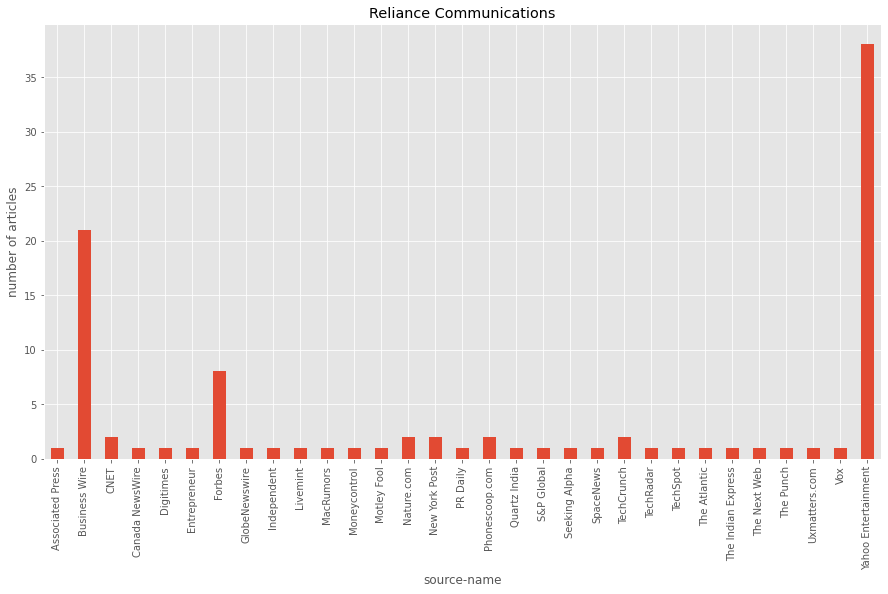

In [48]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title(title)
data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'Reliance Communications'}, ylabel='number of articles'>

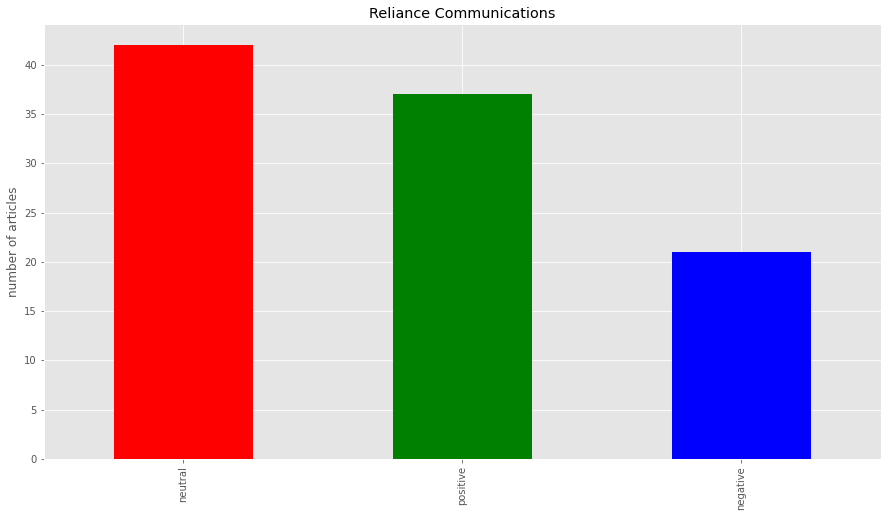

In [49]:
pd.value_counts(data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title=title)

### word cloud

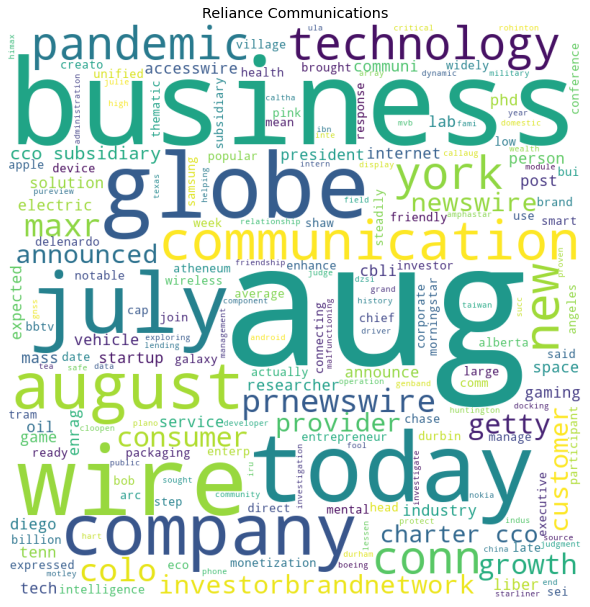

In [50]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(title)  
plt.show()

In [51]:
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T03:04:00Z,0.312121,2021-07-28
1,2021-07-28T19:00:00Z,-0.100000,2021-07-28
2,2021-07-28T21:05:00Z,0.033333,2021-07-28
3,2021-07-29T04:31:00Z,0.136364,2021-07-29
4,2021-07-29T11:00:00Z,-0.066667,2021-07-29


In [52]:
price_sentiment_merge = rel_com.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,3.0,0.136364
1,2021-07-29,3.0,-0.066667


### scatter plot between sentiment analysis and share closing price

<AxesSubplot:xlabel='Close'>

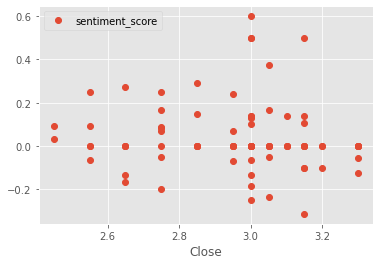

In [53]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'Reliance Communications'}, xlabel='date', ylabel='sentiment of the day'>

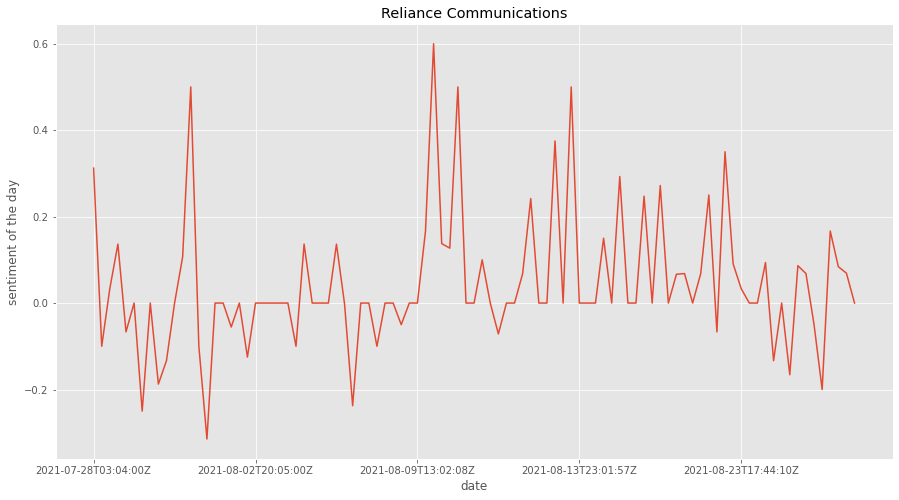

In [54]:
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)

## tata motors

In [55]:
title = 'Tata Motors'

In [56]:
data = pd.read_csv('/Users/praveen/Downloads/isb/term2/text_analytics_data/tata_motors/tata_motors_text_analytics.csv')

In [57]:
data.head(2)

,Unnamed: 0,date,source-id,source-name,author,title,description,content,tweet,clean_trans,word_count,char_count,word_token,sent_token,pos,ner,sentiment_score,sentiment,imp_keyword
0,0,2021-08-25T04:19:00Z,reuters,Reuters,Reuters,Indian shares near record highs on Tata Motors...,Indian shares hovered near record highs on Wed...,A general view of the Bombay Stock Exchange (B...,A general view of the Bombay Stock Exchange (B...,general view bombay stock exchange bse sensex ...,27,171,"['general', 'view', 'bombay', 'stock', 'exchan...",['general view bombay stock exchange bse sense...,"[('general', 'JJ'), ('view', 'NN'), ('bombay',...","('general view bombay stock exchange bse', 0, ...",0.15,positive,reuters reuter surpassed mumbai view bombay
1,1,2021-08-20T04:15:00Z,reuters,Reuters,Reuters Staff,"Indian shares fall as banking stocks, Tata Ste...","Indian shares slipped on Friday, dragged by fi...","By Reuters Staff\r\nBENGALURU, Aug 20 (Reuters...","By Reuters Staff\r\nBENGALURU, Aug 20 (Reuters...",reuters staff bengaluru aug 20 reuters indian ...,25,171,"['reuters', 'staff', 'bengaluru', 'aug', '20',...",['reuters staff bengaluru aug 20 reuters india...,"[('reuters', 'NNS'), ('staff', 'NN'), ('bengal...","('reuters', 0, 7, 'ORG', 'Companies, agencies,...",0.00,neutral,share reuters stronger stock heavyweight


### Articles Collected from Different Sources

<AxesSubplot:title={'center':'Tata Motors'}, xlabel='source-name', ylabel='number of articles'>

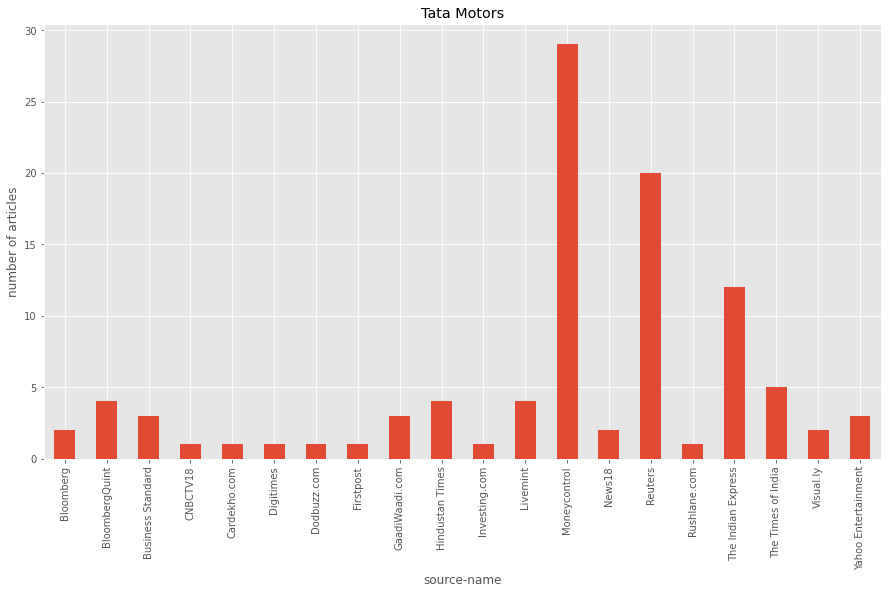

In [58]:
ax = plt.subplot()
ax.set_ylabel('number of articles')
ax.set_xlabel('source name')
ax.set_title(title)
data.groupby('source-name').count()['Unnamed: 0'].plot(kind='bar',figsize=(15,8), ax = ax)

### Sentiment Distribution

<AxesSubplot:title={'center':'Tata Motors'}, ylabel='number of articles'>

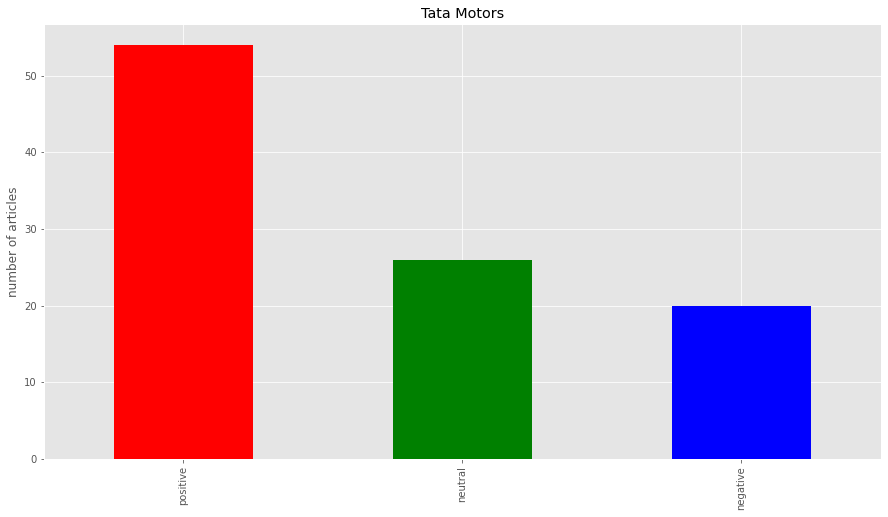

In [59]:
pd.value_counts(data['sentiment']).plot(kind='bar',color=['red','green','blue'], figsize=(15,8),ylabel='number of articles',title=title)

### word cloud

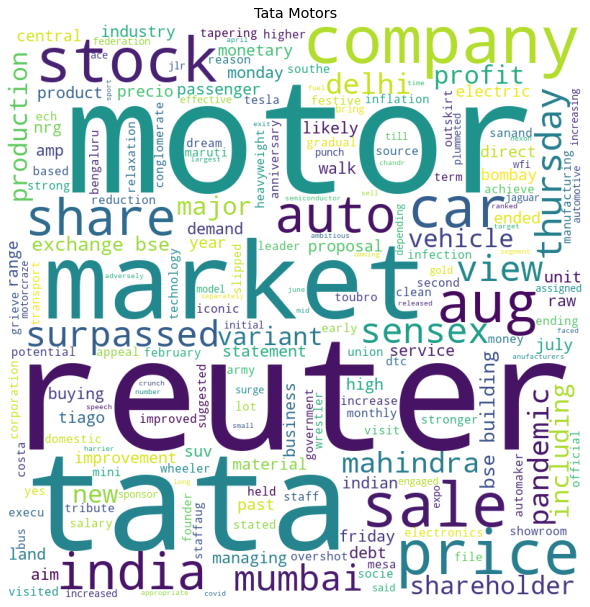

In [60]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.imp_keyword:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title(title)  
plt.show()

In [61]:
new_data = data.groupby('date').mean()['sentiment_score'].reset_index()
new_data['Date'] = new_data['date'].apply(lambda x:x.split('T')[0])
new_data.head()

,date,sentiment_score,Date
0,2021-07-28T07:32:06Z,0.000000,2021-07-28
1,2021-07-28T07:44:43Z,0.000000,2021-07-28
2,2021-07-28T09:02:19Z,0.142857,2021-07-28
3,2021-07-28T10:45:18Z,0.000000,2021-07-28
4,2021-07-29T04:36:12Z,0.020833,2021-07-29


In [62]:
price_sentiment_merge = tatamotors.merge(new_data[['Date','sentiment_score']], on='Date', how='left')
price_sentiment_merge['sentiment_score'] = price_sentiment_merge['sentiment_score'].fillna(0)
price_sentiment_merge.head(2)

,Date,Close,sentiment_score
0,2021-07-29,292.899994,0.020833
1,2021-07-29,292.899994,0.000000


### scatter plot between sentiment analysis and share closing price

<AxesSubplot:xlabel='Close'>

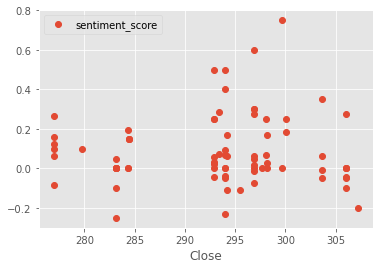

In [63]:
price_sentiment_merge.plot(x='Close', y='sentiment_score', style='o')

### Trend of Sentiment Score – 30 days

<AxesSubplot:title={'center':'Tata Motors'}, xlabel='date', ylabel='sentiment of the day'>

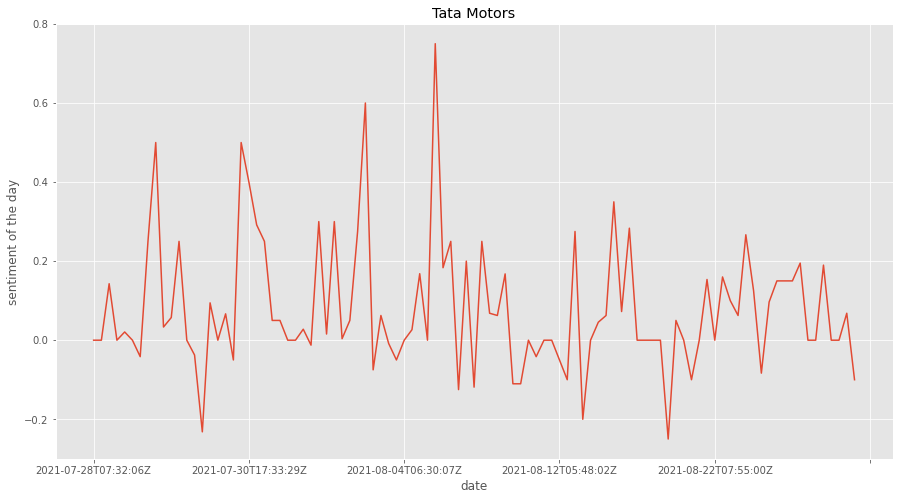

In [64]:
ax = plt.subplot()
ax.set_ylabel('sentiment of the day')
ax.set_xlabel('date')
ax.set_title(title)
data.groupby('date').mean()['sentiment_score'].plot(figsize=(15,8), ax = ax)